Importing required libraries


In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_csv('retail_store_sales.csv')

In [108]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [110]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [111]:
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [112]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])

In [113]:
df.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date
count,11966.000000,11971.000000,11971.000000,12575
mean,23.365912,5.536380,129.652577,2023-07-12 20:23:41.105368064
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,14.000000,3.000000,51.000000,2022-09-30 00:00:00
50%,23.000000,6.000000,108.500000,2023-07-13 00:00:00
75%,33.500000,8.000000,192.000000,2024-04-24 00:00:00
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00
std,10.743519,2.857883,94.750697,NaN


<Axes: >

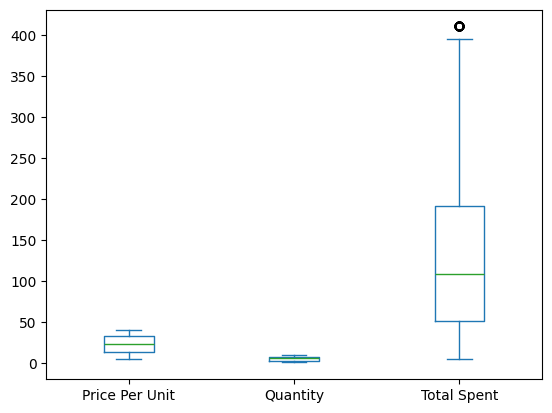

In [114]:
df[['Price Per Unit','Quantity','Total Spent']].plot(kind='box',)

In [115]:
# not much outliers are present 

In [116]:
df['Item']

0         Item_10_PAT
1        Item_17_MILK
2         Item_12_BUT
3         Item_16_BEV
4         Item_6_FOOD
             ...     
12570     Item_23_PAT
12571      Item_2_BEV
12572      Item_7_BUT
12573      Item_7_FUR
12574     Item_9_FOOD
Name: Item, Length: 12575, dtype: object

In [117]:
df.head(15)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


In [118]:
# as category and item colums are nothing but same but the difference is that 
# in col-item item code is given and it has null values also so lets drop items col.

In [119]:
df.drop(columns=['Item'], inplace=True)


In [120]:
df.head()

,Transaction ID,Customer ID,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [121]:
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [122]:
df[df.isna().any(axis=1)]


,Transaction ID,Customer ID,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
3,TXN_9458126,CUST_06,Beverages,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
5,TXN_7482416,CUST_09,Patisserie,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
7,TXN_1372952,CUST_21,Furniture,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
11,TXN_5422631,CUST_09,Milk Products,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
14,TXN_2490363,CUST_09,Milk Products,27.5,2.0,55.0,Digital Wallet,Online,2022-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...
12564,TXN_2153066,CUST_17,Electric household essentials,29.0,NaN,NaN,Digital Wallet,In-store,2024-03-28,False
12568,TXN_1096134,CUST_06,Food,9.5,8.0,76.0,Digital Wallet,In-store,2022-06-11,NaN
12570,TXN_9347481,CUST_18,Patisserie,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12572,TXN_5306010,CUST_11,Butchers,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN


In [123]:
df['Category'].value_counts() # we get high sold and least sold product detail

Category
Electric household essentials         1591
Furniture                             1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: count, dtype: int64

In [124]:
# calculated unit price where total price and quantity is present 
#   price per unit = total spent / Quantity
df.loc[df['Price Per Unit'].isna(), 'Price Per Unit'] = df['Total Spent'] / df['Quantity']


In [125]:
#calculating quantity where total spent and unit price present
#   Quantity = total spent / price per unit
df.loc[df['Quantity'].isna(), 'Quantity']= df['Total Spent'] / df['Price Per Unit']

In [126]:
df.loc[df['Total Spent'].isna(), 'Total Spent'] = df['Price Per Unit'] * df['Quantity']


In [127]:
df.isna().sum() # remaining null values of Quantity and Total spent are those rows 
                # where both Quantity as well as Total spent are null 

Transaction ID         0
Customer ID            0
Category               0
Price Per Unit         0
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [128]:
#calculating % of null val 

null_percent=(df['Quantity'].isna().sum()/(df.shape)[0])*100
print(f'from whole column % of null values is :{null_percent}%') #its very less 

from whole column % of null values is :4.8031809145129225%


In [129]:
#droping those rows
df1=df




In [130]:
[df1.isna().sum()]

[Transaction ID         0
 Customer ID            0
 Category               0
 Price Per Unit         0
 Quantity             604
 Total Spent          604
 Payment Method         0
 Location               0
 Transaction Date       0
 Discount Applied    4199
 dtype: int64]

In [131]:
df1.dropna(subset=['Quantity', 'Total Spent', 'Discount Applied'], inplace=True)


In [132]:
[df1.isna().sum()]

[Transaction ID      0
 Customer ID         0
 Category            0
 Price Per Unit      0
 Quantity            0
 Total Spent         0
 Payment Method      0
 Location            0
 Transaction Date    0
 Discount Applied    0
 dtype: int64]

In [133]:
#now dataset is cleaned 

In [134]:
df=df1

In [135]:
df

,Transaction ID,Customer ID,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
4,TXN_4575373,CUST_05,Food,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
6,TXN_3652209,CUST_07,Food,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
...,...,...,...,...,...,...,...,...,...,...
12566,TXN_6298574,CUST_01,Milk Products,5.0,4.0,20.0,Cash,Online,2023-05-09,False
12567,TXN_4890318,CUST_25,Butchers,8.0,5.0,40.0,Credit Card,In-store,2023-03-28,False
12569,TXN_2318174,CUST_18,Patisserie,5.0,9.0,45.0,Digital Wallet,In-store,2024-05-13,False
12571,TXN_4009414,CUST_03,Beverages,6.5,9.0,58.5,Cash,Online,2022-08-12,False


In [136]:
# analysing year on year sales data
df['Year'] = df['Transaction Date'].dt.year

In [137]:
# taking sum of year spent 
yearly_sale=df.groupby('Year')['Total Spent'].sum().reset_index()

In [138]:
yearly_sale

,Year,Total Spent
0,2022,346533.5
1,2023,320194.5
2,2024,355840.5
3,2025,17010.0


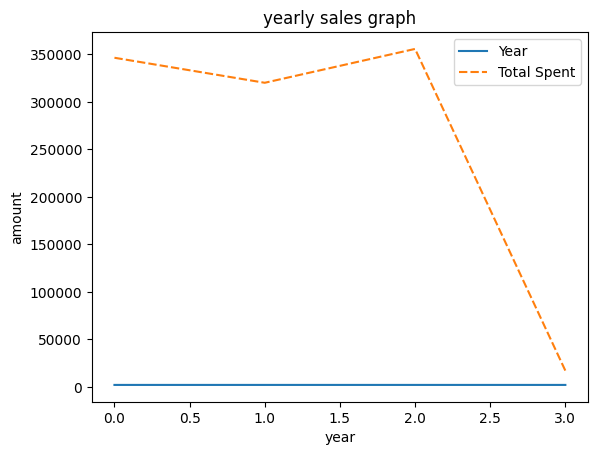

In [139]:
sns.lineplot(data=yearly_sale)
plt.title('yearly sales graph')
plt.xlabel('year')
plt.ylabel('amount')
plt.show()

C:\Users\ANUJ\AppData\Local\Temp\ipykernel_14552\2609378932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sale, x='Year', y='Total Spent', palette='viridis')


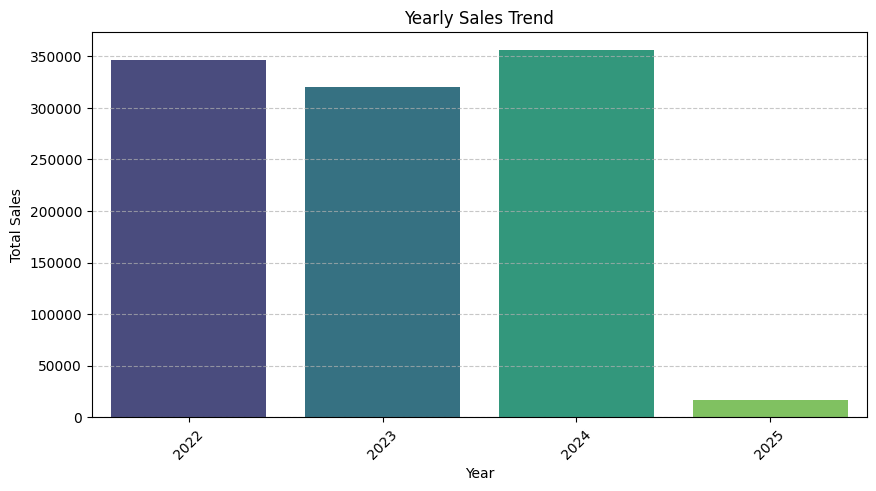

In [140]:
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_sale, x='Year', y='Total Spent', palette='viridis')

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Trend")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [141]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied', 'Year'],
      dtype='object')

In [142]:
df['Month'] = df['Transaction Date'].dt.month
monthly_sales = df.groupby(['Year', 'Month'])['Total Spent'].sum().reset_index()

In [143]:
monthly_sales

,Year,Month,Total Spent
0,2022,1,35767.0
1,2022,2,28603.0
2,2022,3,27280.5
3,2022,4,27444.0
4,2022,5,26949.5
5,2022,6,26928.0
6,2022,7,32196.0
7,2022,8,26522.0
8,2022,9,29926.0
9,2022,10,27466.5


Text(0.5, 1.0, 'Monthly Sales Trend')

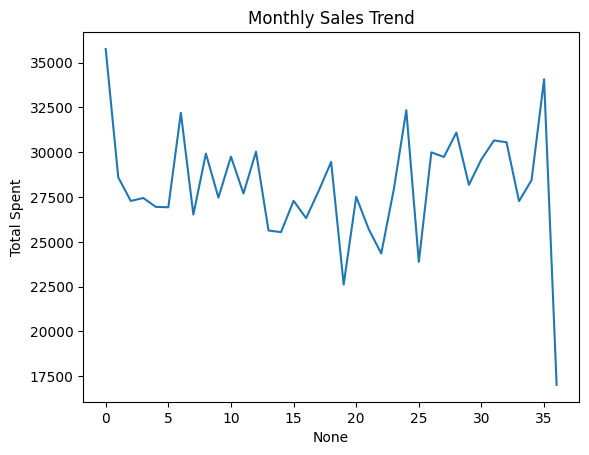

In [144]:
sns.lineplot(x=monthly_sales.index,y='Total Spent',data=monthly_sales)
plt.title('Monthly Sales Trend')
